In [163]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score

import collections

import torch
from torch import nn
from torch.nn import functional as F


In [164]:
max_words=10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [165]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [166]:
x_train = vectorize_sequences(x_train, max_words)
x_test = vectorize_sequences(x_test, max_words)

In [167]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(max_words,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [168]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [169]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.8086 - loss: 0.4202 - val_accuracy: 0.8816 - val_loss: 0.2955
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9452 - loss: 0.1516 - val_accuracy: 0.8808 - val_loss: 0.3022
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9741 - loss: 0.0793 - val_accuracy: 0.8776 - val_loss: 0.3735
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9936 - loss: 0.0267 - val_accuracy: 0.8824 - val_loss: 0.5279
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9995 - loss: 0.0042 - val_accuracy: 0.8892 - val_loss: 0.6404
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 1.0000 - loss: 9.6319e-04 - val_accuracy: 0.8856 - val_loss: 0.7253
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 1.0000 - loss: 2.9417e-04 - val_accuracy: 0.8848 - val_loss: 0.7794
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 1.0000 - loss: 1.6983e

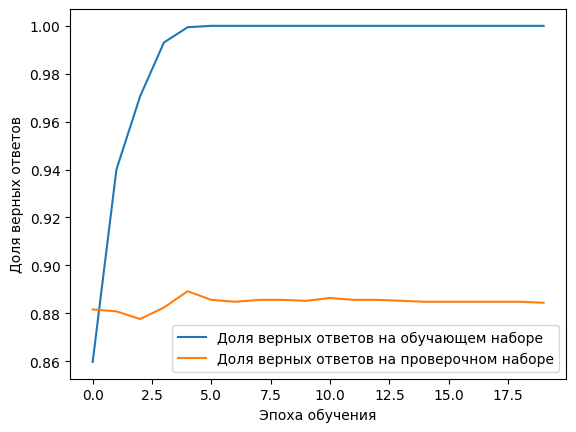

In [170]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [171]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8650 - loss: 1.1573


In [172]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 86.58


In [174]:
new_review = "I liked the film very much. I can say with confidence that all the awards that this tape has received, it has received absolutely deservedly."

In [178]:
# Функция для предсказания оценки фильма
def predict_review(review):
    # Преобразуем отзыв в последовательность индексов
    words = review.lower().split()
    word_index = imdb.get_word_index()

    # Создаем последовательность индексов для нового отзыва
    review_sequence = [word_index.get(word, 2) for word in words]  # 2 — индекс для 'UNK' (неизвестное слово)

    # Векторизация нового отзыва
    new_review_vector = np.zeros((1, max_words))
    new_review_vector[0, review_sequence] = 1.

    # Предсказание
    prediction = model.predict(new_review_vector)

    # Интерпретация результата
    sentiment_score = prediction[0][0]

    if sentiment_score >= 0.5:
        sentiment = "Положительный отзыв"
        rating = round(sentiment_score * 10)  # Оценка от 0 до 10
    else:
        sentiment = "Отрицательный отзыв"
        rating = round((1 - sentiment_score) * 10)  # Оценка от 0 до 10

    return sentiment, rating

# Новый отзыв для тестирования
#new_review = "This movie was terrible. The plot was boring and the acting was awful."
sentiment, rating = predict_review(new_review)

print(f"Отзыв: {new_review}")
print(f"Результат анализа: {sentiment}")
print(f"Оценка фильма: {rating}/10")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Отзыв: This movie was terrible. The plot was boring and the acting was awful.
Результат анализа: Положительный отзыв
Оценка фильма: 10/10
